In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

**importing the wanted data form kaggle**

In [2]:
!kaggle datasets download -d tongpython/cat-and-dog


 96% 209M/218M [00:08<00:00, 21.8MB/s]
100% 218M/218M [00:09<00:00, 25.3MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  cat-and-dog.zip
replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_set/test_set/cats/_DS_Store  
replace test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_set/test_set/cats/cat.4001.jpg  
replace test_set/test_set/cats/cat.4002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_set/test_set/cats/cat.4002.jpg  
replace test_set/test_set/cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_set/test_set/cats/cat.4003.jpg  
replace test_set/test_set/cats/cat.4004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_set/test_set/cats/cat.4004.jpg  
replace test_set/test_set/cats/cat.4005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

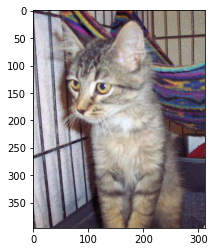

In [2]:
img = image.load_img("training_set/training_set/cats/cat.2.jpg")
plt.imshow(img)

In [3]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator( rescale = 1./255)
                                   

In [4]:
train_dataset = train.flow_from_directory('training_set/training_set', target_size=(200,200),batch_size= 20, class_mode= 'binary')
test_dataset = test.flow_from_directory('training_set/training_set', target_size=(200,200),batch_size= 20, class_mode= 'binary')

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation= 'relu', input_shape = (200,200,3)), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation= 'relu', input_shape = (200,200,3)), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu', input_shape = (200,200,3)), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(50,activation= 'relu'),
                                    tf.keras.layers.Dense(50,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')])


In [8]:
model.compile(loss= 'binary_crossentropy', optimizer= RMSprop(learning_rate= 0.001), metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset, steps_per_epoch= 100, epochs = 5)

Epoch 1/5
100/100 [==============================] - 73s 722ms/step - loss: 0.7610 - accuracy: 0.5365
Epoch 2/5
100/100 [==============================] - 72s 720ms/step - loss: 0.6587 - accuracy: 0.6095
Epoch 3/5
100/100 [==============================] - 72s 719ms/step - loss: 0.6291 - accuracy: 0.6610
Epoch 4/5
100/100 [==============================] - 72s 719ms/step - loss: 0.5938 - accuracy: 0.6895
Epoch 5/5
100/100 [==============================] - 72s 716ms/step - loss: 0.5666 - accuracy: 0.7130


**by steps per epoch we use only 100 img for every epoch which means 500 imgs is only used not all images**
**by change the hyperparameters you can get better accuracy inshaAllah, but this is a demo ex**

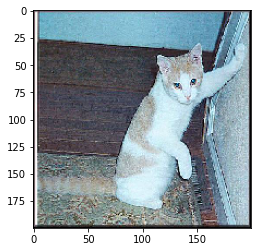

dog


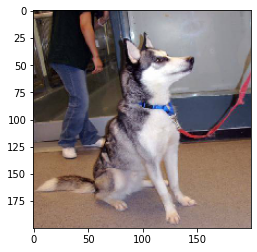

cat


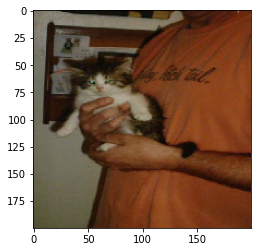

dog


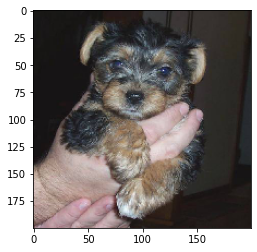

cat


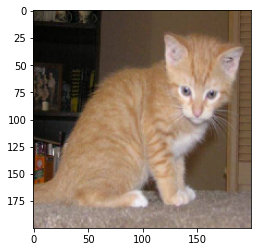

cat


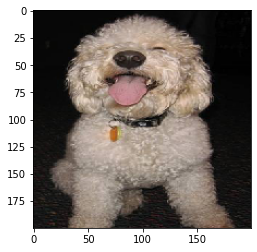

dog


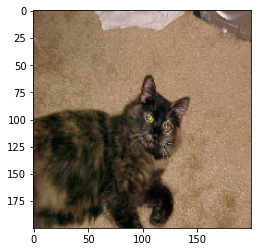

dog


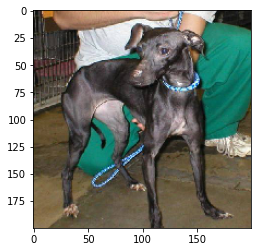

dog


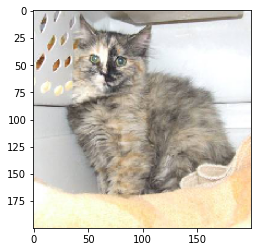

cat


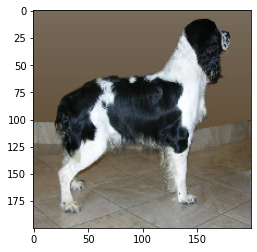

dog


In [41]:
#note that we just use 20 * 4 images of all images in the trainging folders
path = 'test_set/test_set'
img_names = [4001, 4002,4003,4004,4005]
names = ['cat','dog']
for i in img_names:
  for a in names:
    unit = image.load_img(path+'/'+a+'s/'+ a+ '.' +str(i) + '.jpg',target_size = (200,200,3))
    plt.imshow(unit)
    plt.show()
    x = image.img_to_array(unit)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    value = model.predict(images)
    if value == 0:
      print('cat')
    else:
      print("dog")
    
  

    
 


 

  



**it is important to know the names of the imgs of the data to know how to handle them**

In [42]:
import time, psutil
uptime = time.time() - psutil.boot_time()
remain = 12*60*60 - uptime
print(remain/(60*60))


9.71166023015976


**this cell to know the google colab remaining time**



